In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
grid_file = '/archive/miz/mdt/20170324/CM4_c96L33_am4p0_2010_OMp5_H5_ndiff_meke_MLE30d_ePBLn/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ocean_annual.static.nc'
kd_file = '/work/aes/01010101.prog.nc'

In [5]:
geolat = nc.Dataset(grid_file).variables['geolat'][:,:]
geolon = nc.Dataset(grid_file).variables['geolon'][:,:]
lat = nc.Dataset(grid_file).variables['yh'][:]
lon = nc.Dataset(grid_file).variables['xh'][:]

In [58]:
eqidx = np.argmin(abs(lat-0))
Kd = nc.Dataset(kd_file).variables['Kd_interface'][:,1:,eqidx,:]
h = nc.Dataset(kd_file).variables['h'][:,:,eqidx,:]

In [62]:
Kd.shape

(30, 75, 720)

In [63]:
depth_i = h.cumsum(axis=1)

/nbhome/Andrew.Shao/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


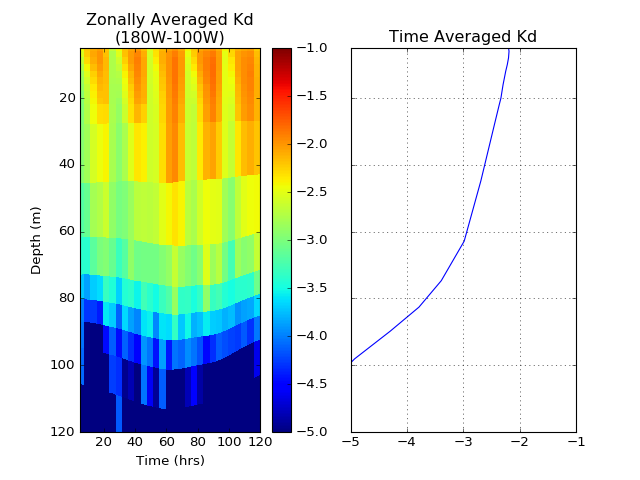

([<matplotlib.axis.XTick at 0x2ac4e85f6da0>,
 <a list of 5 Text xticklabel objects>)

In [133]:
lonidx = np.arange(np.argmin(np.abs(lon-(-180))),np.argmin(np.abs(lon-(-100))))
t = np.arange(1,31,1)*4
t_tile = np.transpose(np.tile(t,(75,1)))
Kd_mean = np.log10(Kd[:,:,lonidx].mean(axis=2))
depth_mean = depth_i[:,:,lonidx].mean(axis=2)
plt.figure()
plt.subplot(1,2,1)
plt.pcolormesh(t_tile,depth_mean,Kd_mean,vmin=-5,vmax=-1)
plt.ylim(5,120)
plt.xlim(5,120)
plt.ylabel('Depth (m)')
plt.xlabel('Time (hrs)')
plt.colorbar()
plt.gca().invert_yaxis()
plt.title('Zonally Averaged Kd\n(180W-100W)')
ax = plt.subplot(1,2,2)
plt.plot(Kd_mean.mean(axis=0),depth_mean.mean(axis=0))
ax.yaxis.label.set_visible(False)
plt.xlim(-5,-1)
plt.ylim(5,120)
plt.title('Time Averaged Kd')
plt.grid()
plt.gca().invert_yaxis()
plt.setp( ax.get_yticklabels(), visible=False)
plt.xticks(np.arange(-5,0,1))

In [100]:
ax.

(30, 75)

In [20]:
Kd[:,:,lonidx].shape

(30, 75)

In [77]:
np.shape(depth_i[:,239:339,lonidx].mean(axis=1))

(30,)

In [79]:
np.shape(Kd[:,239:339,lonidx].mean(axis=1))

(30,)